## SIRS Model

This code runs the SIRS Model example. The compartmental model is described in the following diagram:

<img src="./src/images/SIRS_Compartmental.png" height="200">


In [77]:
import sys
sys.path.append('./src/')
import jsf

import pandas as pd
import random
import matplotlib.pyplot as plt


# Define the initial conditions
S0 = 1*pow(10, 6)
I0 = 20
R0 = 0

# Define the Parameters
pbeta = 2/7
pgamma = 1/7
pwane = 1/365
pmu =    1/(85*365)
pkappa = 1/(85*365)

# Define the final time
t_max = 2*365

x0 = [S0, I0, R0]

# Define the stoichiometry
reactant_matrix =[[1, 1, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [0, 0, 1]]

product_matrix = [[0,2,0],
                  [0,0,1],
                  [2,0,0],
                  [1,1,0],
                  [1,0,1],
                  [0,0,0],
                  [0,0,0],
                  [0,0,0],
                  [1,0,0]]

# Define the rates
rates = lambda x, t: [pbeta  * x[0] * x[1] / ( x[0] + x[1] + x[2] ),
                      pgamma * x[1],
                      pkappa * x[0],
                      pkappa * x[1],
                      pkappa * x[2],
                      pmu    * x[0],
                      pmu    * x[1],
                      pmu    * x[2],
                      pwane  * x[2]]

stoich = {
         "nu": [ [a - b for a, b in zip(r1, r2)]
                for r1, r2 in zip(product_matrix, reactant_matrix) ],
         "DoDisc": [0, 0, 0],
         "nuReactant": reactant_matrix,
         "nuProduct": product_matrix,
         }

my_opts = {
            "EnforceDo": [0, 0, 0],
            "dt": 0.01,
            "SwitchingThreshold": [pow(10,4), pow(10,4), pow(10,4)]
           }


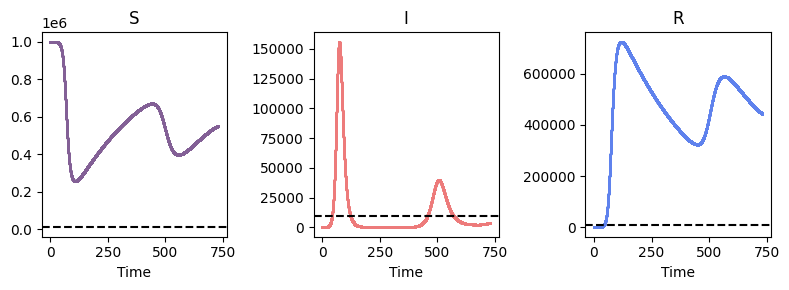

In [78]:
sim = jsf.jsf(x0, rates, stoich, t_max, config=my_opts, method="operator-splitting")


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

# Plot S
axes[0].plot(sim[1], sim[0][0], label="S", marker=".", markersize=0.5, linewidth=0, color=(0.5137, 0.3765, 0.5882))
axes[0].set_title("S")
axes[0].axhline(y=my_opts["SwitchingThreshold"][0], color="k", linestyle="--")

# Plot I
axes[1].plot(sim[1], sim[0][1], label="I", marker=".", markersize=0.5, linewidth=0, color=(0.9294, 0.4824, 0.4824))
axes[1].set_title("I")
axes[1].axhline(y=my_opts["SwitchingThreshold"][1], color="k", linestyle="--")

# Plot R
axes[2].plot(sim[1], sim[0][2], label="R", marker=".", markersize=0.5, linewidth=0, color=(0.3725, 0.5098, 0.9294))
axes[2].set_title("R")
axes[2].axhline(y=my_opts["SwitchingThreshold"][2], color="k", linestyle="--")

# Set common x-axis label
axes[0].set_xlabel("Time")
axes[1].set_xlabel("Time")
axes[2].set_xlabel("Time")

plt.tight_layout()
# Show the plot
plt.show()

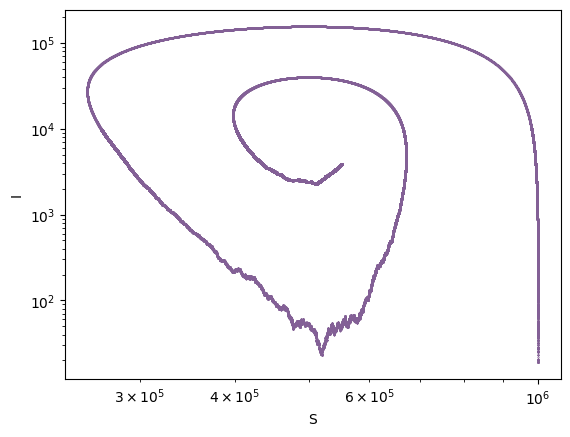

In [81]:
plt.plot(sim[0][0], sim[0][1], marker=".", markersize=0.5, linewidth=0, color=(0.5137, 0.3765, 0.5882))

plt.xlabel("S")
plt.ylabel("I")

plt.yscale("log")
plt.xscale("log")
plt.show()